In [1]:
# Bei Box 3 stimmt etwas mit der Frequenzberechnung noch nicht
# später versuchen plotly zu integrieren.

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import numpy as np


In [10]:
import datetime

def asadate(x):
    return datetime.datetime.strptime(x, '%d.%m.%Y %H:%M')

def phi(datum,ref):
    diff=asadate(datum)-asadate(ref)  # gibt ein timedelta Objekt mit Tagen und Sekunden zurück: datetime.timedelta(354, 22980)
    phi=diff.days+diff.seconds/3600/24
    return phi

# print(phi(fullmoon_dates[0],ref_dates[0]))


#Liste der Daten des jeweiligen letzten Ereignisses im Vorjahr
#Ref: https://www.calsky.com/cs.cgi/Moon/8?&lang=de
fullmoon_dates = ["21.12.2010 09:13","10.12.2011 15:36","28.12.2012 11:21","17.12.2013 10:28","06.12.2014 10:26","25.12.2015 12:11","14.12.2016 01:05","03.12.2017 16:47","22.12.2018 18:48","12.12.2019 06:12"]
perigee_dates  = ["27.12.2010 13:24","22.12.2011 03:50","13.12.2012 00:07","04.12.2013 11:02","24.12.2014 17:33","21.12.2015 10:09","13.12.2016 00:35","04.12.2017 09:52","24.12.2018 10:56","18.12.2019 21:27"]
#nodeN: nördlichste Position
maxN_dates     = ["20.12.2010 13:34","10.12.2011 14:35","26.12.2012 22:23","17.12.2013 01:56","07.12.2014 10:01","25.12.2015 08:25","14.12.2016 22:37","05.12.2017 12:42","23.12.2018 12:48","13.12.2019 21:58"]
#http://astropixels.com/ephemeris/moon/moonnodes2001.html
node_dates     = ["21.12.2010 14:08","23.12.2011 11:36","24.12.2012 22:27","28.12.2013 00:21","29.12.2014 09:27","31.12.2015 20:19","19.12.2016 04:46","22.12.2017 10:04","24.12.2018 11:54","26.12.2019 13:01"]
ref_dates      = ["01.01.2011 00:00","01.01.2012 00:00","01.01.2013 00:00","01.01.2014 00:00","01.01.2015 00:00","01.01.2016 00:00","01.01.2017 00:00","01.01.2018 00:00","01.01.2019 00:00","01.01.2020 00:00"]

tropic_y   = 365.242 
tropic_m   = 27.32        #equator
synodic_m  = 29.53        #full moon
anomal_m   = 27.55        #perigee
draconic_m = 27.21        #ascending node    

case = 0         #wählt aus der Liste ganz oben die Daten aus

first_full    = fullmoon_dates[case]
first_perigee = perigee_dates[case]
first_maxN    = maxN_dates[case]          #nördlichste Position
first_node    = node_dates[case]
ref_date      = ref_dates[case]

jahr = asadate(fullmoon_dates[case]).year+1

A_perihel   = 0.05   # Schulbiologiezentrum Hannover: 0.05
A_equinox   = 0.1    # 0.10
A_syzygy    = 0.5    # 0.50 
A_perigee   = 0.3    # 0.20
A_moon_decl = 0      # 0.10
A_node      = 0      # 0.05

off_full      = phi(fullmoon_dates[case],ref_dates[case])
off_perigee   = phi(perigee_dates[case],ref_dates[case])
off_moon_decl = phi(maxN_dates[case],ref_dates[case])-tropic_m/2
off_node      = phi(node_dates[case],ref_dates[case])         


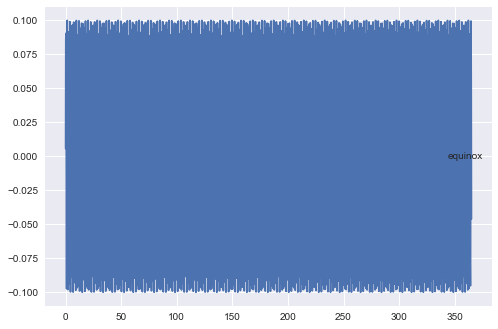

In [15]:
x = np.linspace(0, 365, 2000)
def wave(A,O,PHI):
    return A*np.sin(O*x+PHI)
#   cycle             ampli               omega                 phi          
perihel_wave   = wave(A_perihel     , tropic_y/(2*np.pi)     , -87                     ,)  
equinox_wave   = wave(A_equinox     , tropic_y/2/(2*np.pi)   , 34.5                     ,)  
syzygy_wave    = wave(A_syzygy      , synodic_m/2/(2*np.pi)  , off_full-synodic_m/8     ,)   
perigee_wave   = wave(A_perigee     , anomal_m/(2*np.pi)     , off_perigee-anomal_m/4   ,)  
moon_decl_wave = wave(A_moon_decl   , tropic_m/2/(2*np.pi)   , off_moon_decl-tropic_m/8 ,)
node_wave      = wave(A_node        , draconic_m/2/(2*np.pi) , off_node-draconic_m/8    ,) 

plt.plot(x, equinox_wave, label='equinox')
#plt.plot(x, syzygy_wave, label='syzygy')
#plt.plot(x, perigee_wave, label='perigee')
#plt.plot(x,w1+w2+w3, linestyle='--', label='sum', linewidth=4)
plt.legend();



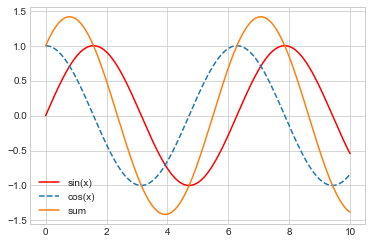

In [3]:
plt.style.use('seaborn-whitegrid')
plt.plot(x, a, color='red', label='sin(x)')
plt.plot(x, b, linestyle='--', label='cos(x)')
plt.plot(x,a+b, label='sum')
plt.legend();